In [62]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import normalize
import numpy as np
import matplotlib.pyplot as plt


In [23]:
dataset = load_breast_cancer()
X = dataset.data
X=normalize(X)
Y = dataset.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)


In [34]:
print(Y_train[:10])

#convert label 0 to -1
Y_train[Y_train==0]=-1
Y_test[Y_test==0]=-1

print(Y_test[:10])

[-1 -1  1  1  1  1 -1 -1  1 -1]
[-1 -1  1  1 -1 -1  1 -1  1  1]


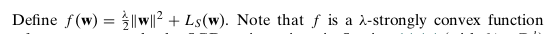
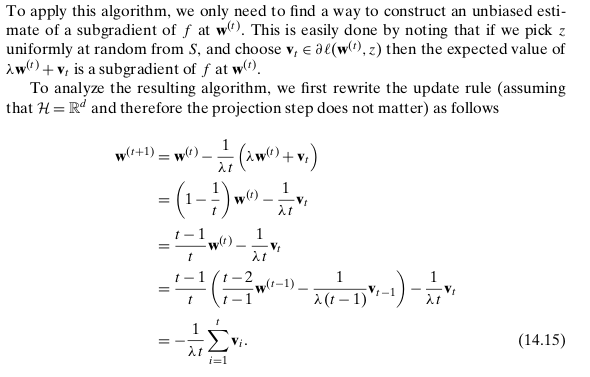

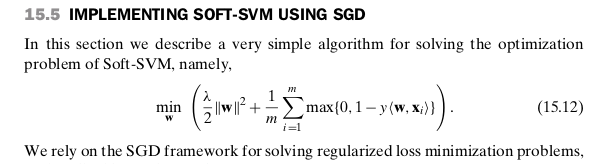

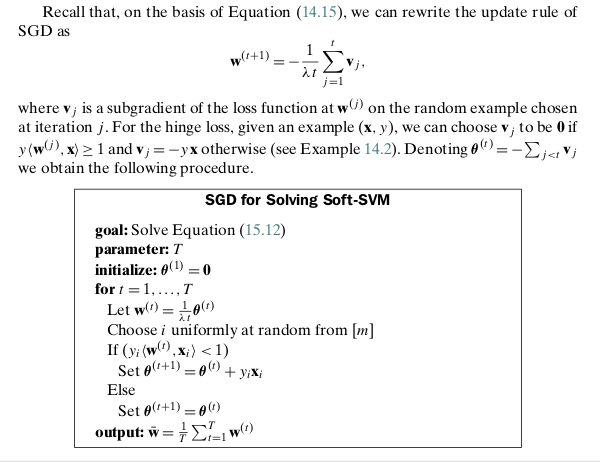

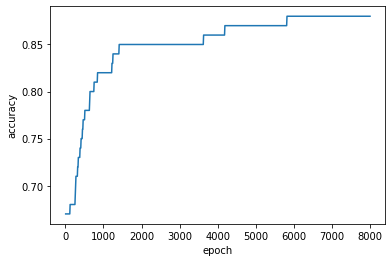

In [76]:
def accuracy(predicted,actual):
    count=0
    for i,j in zip(predicted,actual):
        if (i>0 and j>0) or (i<0 and j<0):
            count+=1
    return round(count/len(actual),2)   

def sgd_predict(w,x):
    y= np.dot(w,x)
    return y

def sgd_gradiant(train,label,lmd,T):
    theta=np.zeros(train.shape[1])
    w=theta
    w_t=np.zeros([T,len(w)])
    
    acc,epoch=[],[]
    for t in range(1,T):
      w=np.divide(theta,lmd*t)
      w_t[t]=w 

      for _ in range(train.shape[0]):
        idx= np.random.randint(0,train.shape[0])
        y_est=sgd_predict(w,train[idx])
        if label[idx]*y_est<1:
            theta=theta+np.multiply(label[idx],train[idx])
  
      if t%9==0:
        w_=np.average(w_t[1:t,:],axis=0)
        pr_out=[round(sgd_predict(w_,X_test[i]),3) for i in range(X_test.shape[0])]
        acc.append(accuracy(pr_out,Y_test))
        epoch.append(t)

    plt.plot(epoch,acc)
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.show()
    return np.average(w_t[1:,:],axis=0)

w=sgd_gradiant(X_train,Y_train,.4,8000)


In [77]:
pr_out=[round(sgd_predict(w,X_test[i]),3) for i in range(X_test.shape[0])]
print(accuracy(pr_out,Y_test))

0.88
